# **Kaggle HW5: [TEAM NAME HERE]**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [1]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv',
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv',
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [60]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [75]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings.

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

In [321]:
import pandas as pd
import scipy.stats 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

In [322]:
df_train = pd.read_csv('edx_train.csv')
df_train.columns

Index(['course_id', 'userid_DI', 'registered', 'viewed', 'explored',
       'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender',
       'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act', 'nplay_video',
       'nchapters', 'nforum_posts'],
      dtype='object')

In [306]:
def test_prediction(model, features):
    # Preprocess test data
    df_test = pd.read_csv('edx_test.csv')
    df_test_dummy = pd.get_dummies(df_test, dummy_na=True)
    imputer = SimpleImputer(strategy='mean')
    df_test_dummy[features] = imputer.fit_transform(df_test_dummy[features])
    
    test_pred = model.predict(df_test_dummy[features])
    
    # Save predictions to a CSV file
    to_save = df_test[['userid_DI']].copy()
    to_save.loc[:, 'certified'] = test_pred
    to_save.to_csv('submission.csv', index=False)
    
    return to_save

In [370]:
# Decision Tree
target = 'certified'
df_train = pd.read_csv('edx_train.csv')

# features = ['course_id', "registered", "viewed", "explored", "gender", "LoE_DI", "YoB","final_cc_cname_DI" ,"nevents","ndays_act","nplay_video","nchapters","nforum_posts"]
# df_train  = df_train[features + [target]]

df_train  = df_train.drop(["userid_DI", "start_time_DI", "last_event_DI"], axis = 1)

df_train = pd.get_dummies(df_train, dummy_na=True)
features = list(df_train.columns)
features.remove(target)

imputer = SimpleImputer(strategy='mean')
df_train[features] = imputer.fit_transform(df_train[features])

train_data, validation_data = train_test_split(df_train, test_size=0.2)

In [375]:
# Train the decision tree classifier
hyperparameters = {'min_samples_leaf': [1,10,25,50,100,150], 'max_depth':[1,5,10,15,20]}

dt_model = DecisionTreeClassifier()
dt_search = GridSearchCV(dt_model, hyperparameters, cv = 10, return_train_score = True)
dt_search.fit(train_data[features], train_data[target])

decision_train_accuracy = dt_search.score(train_data[features], train_data[target])
decision_validation_accuracy = dt_search.score(validation_data[features], validation_data[target])
print([decision_train_accuracy,decision_validation_accuracy, dt_search.best_params_])

[0.976306023408507, 0.9697488584474886, {'max_depth': 10, 'min_samples_leaf': 10}]


In [377]:
# Train the decision tree classifier, different folds of cross validation
hyperparameters = {'min_samples_leaf': [1,10,25,50,100,150], 'max_depth':[1,5,10,15,20]}

dt_model = DecisionTreeClassifier()
dt_search = GridSearchCV(dt_model, hyperparameters, cv = 15, return_train_score = True)
dt_search.fit(train_data[features], train_data[target])

decision_train_accuracy = dt_search.score(train_data[features], train_data[target])
decision_validation_accuracy = dt_search.score(validation_data[features], validation_data[target])
print([decision_train_accuracy,decision_validation_accuracy, dt_search.best_params_])

[0.9717385098487011, 0.9771689497716894, {'max_depth': 20, 'min_samples_leaf': 25}]


In [378]:
test_prediction(dt_search, features)

,userid_DI,certified
0,MHxPC130476531,1
1,MHxPC130559898,0
2,MHxPC130552712,1
3,MHxPC130394971,1
4,MHxPC130191077,1
...,...,...
2915,MHxPC130421523,0
2916,MHxPC130116114,0
2917,MHxPC130239033,0
2918,MHxPC130445460,0


In [379]:
# Random Forests
class RandomForest416: 
    
    def __init__(self, num_trees, max_depth=1):
    
        self._trees = [
            DecisionTreeClassifier(max_depth=max_depth) 
            for i in range(num_trees)
        ]
        
    def fit(self, X, y):
        
        for tree in self._trees:
            indices = np.random.randint(0, len(X), size = len(X))
            data_rand = X.iloc[indices]
            target_rand = y.iloc[indices]
            tree.fit(data_rand, target_rand)

    def predict(self, X):
   
        predictions = np.zeros((len(X), len(self._trees)))
        for i, tree in enumerate(self._trees):
            # Make predictions using the current tree
            preds = tree.predict(X)
            
            # Store those predictions in ith column of the 2d array
            predictions[:, i] = preds
            
        # For each row of predictions, find the most frequent label (axis=1 means across columns)
        return scipy.stats.mode(predictions, axis=1, keepdims=False).mode 

In [380]:
# Train Random Forest Clssifier
from sklearn.metrics import accuracy_score
depths = list(range(1, 25, 2))
iter =  [100, 200, 300]
rf_accuracies = []

for i in depths:
    for num in iter:
        print(f'Depth {i}')

        rf = RandomForest416(num_trees = num, max_depth=i)
        rf.fit(train_data[features], train_data[target])
        rf_accuracies.append((
            num,
            i,      
            accuracy_score(rf.predict(train_data[features]), train_data[target]),
            accuracy_score(rf.predict(validation_data[features]), validation_data[target])
        ))

best_depth = max(rf_accuracies, key=lambda x: x[3])[1]
best_num = max(rf_accuracies, key=lambda x: x[3])[0]
best_accuracy = max(rf_accuracies, key=lambda x: x[3])[3]
print(best_depth, best_num, best_accuracy )

Depth 1
Depth 1
Depth 1
Depth 3
Depth 3
Depth 3
Depth 5
Depth 5
Depth 5
Depth 7
Depth 7
Depth 7
Depth 9
Depth 9
Depth 9
Depth 11
Depth 11
Depth 11
Depth 13
Depth 13
Depth 13
Depth 15
Depth 15
Depth 15
Depth 17
Depth 17
Depth 17
Depth 19
Depth 19
Depth 19
Depth 21
Depth 21
Depth 21
Depth 23
Depth 23
Depth 23
11 200 0.978310502283105


In [382]:
# Train Best Model with Highest Validation Accuracy
final_rf = RandomForest416(num_trees=best_num, max_depth=best_depth)
final_rf.fit(train_data[features], train_data[target])

final_val_pred = final_rf.predict(validation_data[features])
final_val_accuracy = accuracy_score(final_val_pred, validation_data[target])

print("Final validation accuracy :", final_val_accuracy)



Final validation accuracy : 0.978310502283105


In [386]:
test_prediction(final_rf, features)

,userid_DI,certified
0,MHxPC130476531,1.0
1,MHxPC130559898,0.0
2,MHxPC130552712,1.0
3,MHxPC130394971,1.0
4,MHxPC130191077,1.0
...,...,...
2915,MHxPC130421523,0.0
2916,MHxPC130116114,0.0
2917,MHxPC130239033,0.0
2918,MHxPC130445460,0.0


In [388]:
# K-NN Model
knn_hyperparameters = {
    'n_neighbors': [1, 3, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = KNeighborsClassifier()

knn_search = GridSearchCV(model, knn_hyperparameters, cv=6, return_train_score=True)
knn_search.fit(train_data[features], train_data[target])

knn_train_accuracy = knn_search.score(train_data[features], train_data[target])
knn_validation_accuracy = knn_search.score(validation_data[features], validation_data[target])

print("Training accuracy:", knn_train_accuracy)
print("Validation accuracy:", knn_validation_accuracy)
print("Best hyperparameters:", knn_search.best_params_)



Training accuracy: 1.0
Validation accuracy: 0.9657534246575342
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [316]:
# Preprocess of test data
test_prediction(knn_search, features)

,userid_DI,certified
0,MHxPC130476531,1
1,MHxPC130559898,0
2,MHxPC130552712,1
3,MHxPC130394971,1
4,MHxPC130191077,1
...,...,...
2915,MHxPC130421523,0
2916,MHxPC130116114,1
2917,MHxPC130239033,0
2918,MHxPC130445460,0


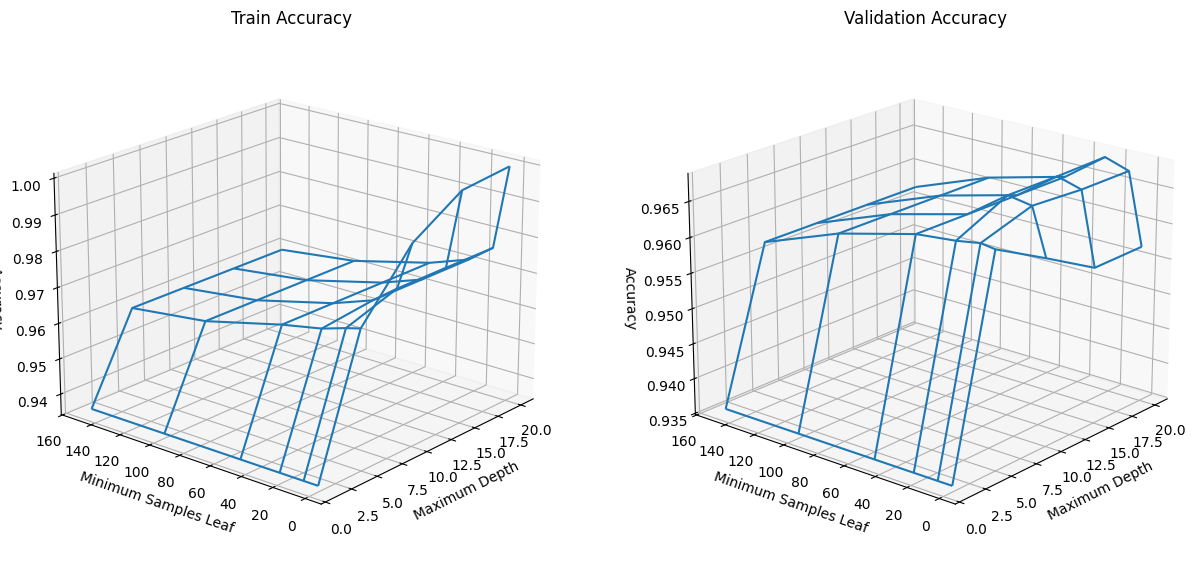

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def plot_scores(ax, title, search, hyperparameters, score_key):
    # Get results from GridSearch and turn scores into matrix
    cv_results = search.cv_results_
    scores = cv_results[score_key]
    scores = scores.reshape((len(hyperparameters['max_depth']), len(hyperparameters['min_samples_leaf'])))
    max_depths = cv_results['param_max_depth'].reshape(scores.shape).data.astype(int)
    min_samples_leafs = cv_results['param_min_samples_leaf'].reshape(scores.shape).data.astype(int)
    
    # Plot result
    ax.plot_wireframe(max_depths, min_samples_leafs, scores)
    ax.view_init(20, 220)
    ax.set_xlabel('Maximum Depth')
    ax.set_ylabel('Minimum Samples Leaf')
    ax.set_zlabel('Accuracy')
    ax.set_title(title)

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

plot_scores(ax1, 'Train Accuracy', dt_search, hyperparameters, 'mean_train_score')
plot_scores(ax2, 'Validation Accuracy', dt_search, hyperparameters, 'mean_test_score')

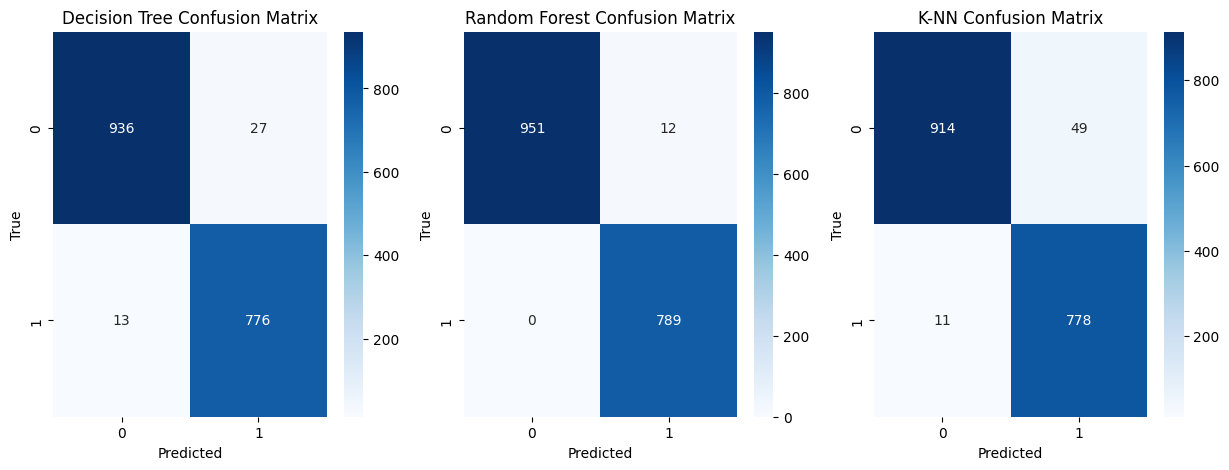

In [393]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained models named dt_model, rf_model, and knn_model

# Get predictions for each model
dt_pred = dt_search.predict(validation_data[features])
rf_pred = final_rf.predict(validation_data[features])
knn_pred = knn_search.predict(validation_data[features])

# Calculate confusion matrices
dt_matrix = confusion_matrix(validation_data[target], dt_pred)
rf_matrix = confusion_matrix(validation_data[target], rf_pred)
knn_matrix = confusion_matrix(validation_data[target], knn_pred)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(dt_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 2)
sns.heatmap(rf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 3)
sns.heatmap(knn_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('K-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()


**Remember to submit your submissions CSV FILE on Kaggle!** 40 pts come from your accuracy on the private test data.

Attend section on Thurs 5/11 for a demo of how to uppload submissions to Kaggle. We also have screenshots below (ingore summer and homework number in pictures)

Step 1: See the list of files on Colab

![See Colab Files](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/1_colab_see_files.jpg)

Step 2: Download `submission.csv`

![Download Colab File](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/2_colab_download_file.jpg)

Step 3: Join the Kaggle competition.

![Join the Kaggle Competition](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/3_kaggle_join_competition.jpg)

Step 4: Enusre your team name in Kaggle matches the one at the top of this notebook!

![Check Team Name](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/4_kaggle_team_name.jpg)

Step 5: Upload `submission.csv` to Kaggle

![Upload submission.csv](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/6_kaggle_upload_submission.jpg)



### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

I experimented with three different models: Decision Tree, Random Forest, and K-Nearest Neighbors. To enhance the accuracy of my initial predictions, I employed grid search cross-validation to fine-tune the hyperparameters for each model.

For the Decision Tree model, I adjusted the minimum number of samples leaf and the maximum depth of the tree. The optimal configuration I found was a minimum of 25 samples leaves and a maximum depth of 10.

In the case of Random Forest, I optimized the number of iterations and the maximum depth of the trees. After running all the combinations, I discovered that setting the depth to 15 and 200 iterations produced the highest validation accuracy.

For K-NN model, I adjusted the number of neighbors considered, the weighting scheme, and the distance metric used. I found that employing 10 neighbors, using Manhattan weighing by distance yielded the highest validation accuracy.

The depth of trees for both Decision Tree and Random Forest, as well as the number of neighbors for K-NN, emerged as crucial factors in achieving optimal accuracy. In general, using grid search cross validation to fine-tune hyperparameters, I was able to optimize the performance of each model and enhance the accuracy of my predictions.

From the confusion matrices of three classification models, we can clearly see their accuracy and compare the number of false positives and false negatives among them. Obviously, the Random Forest model shows the best performance, with the smallest number of both false positives and false negatives. The other two models have similar confusion matrices, but the Decision Tree model performs slightly better than the K-NN model.

#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

I exclude the features 'userid_DI', 'start_time_DI', and 'last_event_DI' wfrom the training data as they were not significantly correlated with the target variable, which is 'certified'. And Categorical variables were one-hot encoded to facilitate computation. Additionally, to deal with missing values, dummy variables were created for categorical features. Moreover, I imputed the mean of columns into the missing(nan) values, which is a quick and simple yet less precise method. 

#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

Since historical data does not represent the most recent student group, the data may be biased and therefore incorrect prediction of targeting student group may be made when other environmental factors change and results in the loss of their profit.

Dataset requires a large amount of student data. Therefore, it is important to ensure that this data is used ethically because the dataset contains students' private information, such as year of birth, IP address and gender. Misuse or leakage could harm student in some way. Additionally, students should be informed how their data will be used and give a consent.